<a href="https://colab.research.google.com/github/ferit-osirv/lab1/blob/main/lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3 - Thresholding and Binary Morphology

These laboratory excersises are solved on Google Colab and are save on GitHub repo that is connected to GitHub Classroom.

## Tools You need to use to Submit Assignments

In this document, you will solve tasks. This is a Jupyter Notebook which has the **.ipynb** extension, is an interactive web environment for data analysis, visualization, solution presentations, education, and more.

**Google Colab** is a tool that allows you to run and share Jupyter Notebook files on Google's servers, including the use of Google's CPU, GPU, and TPU resources. Colab is like Google Docs for Jupyter Notebooks. **Google Colab does not automatically save your assignment to GitHub.**

**You use GitHub to save and submit your assignments.** When you accept the assignment through GitHub Classroom, a repository is automatically created on your GitHub account with a copy of the task. This is where you will save your solutions. Saving your solutions submits the tasks for that lab.

## How to Solve the Tasks?
1. Accept the task via the Google Classroom link that you will receive. Google Classroom will create a repository on your account.
2. Go to the newly created repository on your account and click on the .ipynb file, then click Open in Colab.
3. You will solve the tasks in Google Colab.

## How to Save (Submit) Tasks?

1. In Google Colab, click on the Open settings gear icon in the top-right corner.
2. Click on the GitHub tab and check the box for Access private repositories and organizations.
3. A new window will open for you to grant access to GitHub. For ferit-osirv, click Grant.
4. Save and exit the settings.
5. Click on File > Save a copy in GitHub.
6. Select the lab repository that includes your name.

> *Note:* You only need to complete steps 1-4 the first time.

7. Click on **File > Save a copy in GitHub**.
8. Select created repository **koji uključuje vaše ime**.

## Copying Files from a GitHub Repository

To complete the exercises, you will need images and other files that are located in the GitHub repository of the exercise. This command will be available in the notebook for each exercise. It will copy files from GitHub to the Google Colab environment.

**You need to run this command before starting each exercise.**

In [1]:
!rm -rf clone && git clone https://github.com/ferit-osirv/lab2 clone && cp -a clone/. .

Cloning into 'clone'...
remote: Repository not found.
fatal: repository 'https://github.com/ferit-osirv/lab2/' not found


**Google Colab will occasionally delete all files.** Therefore, it may be necessary to rerun this command between sessions. If you are getting errors about missing files, try running the above command again.

In [6]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

# Thresholding

## What is Thresholding?

The simplest segmentation method

Application example: Separate out regions of an image corresponding to
objects which we want to analyze. This separation is based on the variation
of intensity between the object pixels and the background pixels.

To differentiate the pixels we are interested in from the rest (which will
eventually be rejected), we perform a comparison of each pixel intensity
value with respect to a threshold (determined according to the problem to
solve).

Once we have separated properly the important pixels, we can set them with
a determined value to identify them (i.e. we can assign them a value of 0
(black), 255 (white) or any value that suits your needs).

![](https://docs.opencv.org/2.4/_images/Threshold_Tutorial_Theory_Example.jpg)


## Simple Thresholding

Here, the matter is straight forward. If pixel value is greater than a
threshold value, it is assigned one value (may be white), else it is assigned
another value (may be black). The function used is `cv2.threshold`. First
argument is the source image, which should be a grayscale image. Second
argument is the threshold value which is used to classify the pixel values.
Third argument is the ` maxVal ` which represents the value to be given if pixel
value is more than (sometimes less than) the threshold value. OpenCV provides
different styles of thresholding and it is decided by the fourth parameter of
the function. Different types are:

- cv2.THRESH_BINARY
- cv2.THRESH_BINARY_INV
- cv2.THRESH_TRUNC
- cv2.THRESH_TOZERO
- cv2.THRESH_TOZERO_INV

To illustrate how these thresholding processes work, let’s consider that we
have a source image with pixels with intensity values $` src(x,y) `$. 
The plot below
depicts this. The horizontal blue line represents the threshold $` thresh `$ (fixed).

![](https://docs.opencv.org/2.4/_images/Threshold_Tutorial_Theory_Base_Figure.png)

The documentation clearly explains what each type is meant for. [Please check out the
documentation](http://docs.opencv.org/doc/tutorials/imgproc/threshold/threshold.html).

## Task 3

Using OpenCV, load the image `images/apple.jpg` as a **grayscale** image. Perform simple **binary** thresholding in two ways: 1) using the OpenCV function mentioned above, and 2) using NumPy by setting all pixels above a certain value to 255 and others to 0. Display the thresholded image.

In [3]:
# opencv

In [4]:
# numpy

### ### Otsu Binarization

**Binarization** of an image is the process of converting the image into a format where each pixel can only be one of two possible values. For `uint8` images, these values are usually `0` (black) and `255` (white). For `float` images, the values are `0` (black) or `1.0` (white). **Binarization** is often a precursor to **thresholding**, where the image is divided into completely white and black regions, and then only the parts of the original image that are completely white in the binary image are retained. Mathematically, by multiplying the original and binary images, the pixels that are completely white in the binary image remain unchanged, while those that are completely black are multiplied by 0, resulting in a completely black pixel in the product image.

In the previous example, you manually determined the threshold. Otsu binarization is a more advanced method that determines the optimal threshold based on the **histogram** of the image, which best separates the pixels. A histogram is a graph that shows the frequency of each value in a data set. In the case of an image, the histogram shows, for each color value, how many pixels are of that color.

Let's take a look at the histogram of the `apple.jpg` image.

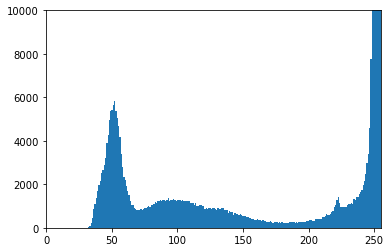

In [11]:
img = cv.imread('images/apple.jpg', cv.IMREAD_GRAYSCALE)
plt.hist(img.flatten(), bins=256, range=(0, 255))
plt.ylim([0, 10000])
plt.xlim([0, 255])
plt.show()

From the histogram, it is evident that most pixels are grouped around the values 255 and 50. By approximation, we see that the optimal way to separate the pixels into two groups would be with a threshold between 150 and 200, as this threshold effectively separates the two largest groups of pixels.

## Task 4

According to the following link, implement Otsu binarization for the `apple.jpg` image. Display the resulting binary image **using Matplotlib**. Print the optimal threshold value determined by the Otsu method to the console.

In [ ]:
# write your code here

Such a binary image can be used as a **mask** for the original image. A mask is a binary image where the value is `0` for all pixels that should not be visible, and the maximum value (`1.0` or `255`) for pixels that should be visible.

## Task 5

Using the Otsu binary image as a mask, apply the function `img_thresholded = cv.bitwise_and(img, img, mask=mask)` where `img` is the original grayscale image of the apple, and `mask` is the Otsu binary image.

## Improving Masks with Binary Morphology

Morphological operations such as `erosion`, `dilation`, `closing` and `opening` are common tools used to improve masks after they are generated by thresholding. They can be used to fill small holes, remove noise, increase or decrease the size of an object, or smoothen mask outlines.

Most morphological operations are once again simple kernel functions that are applied at each pixel of the image based on their neighborhood as defined by a `structuring element (SE)`. For example, `dilation` simply assigns to the central pixel the maximum pixel value within the neighborhood; it is a maximum filter. Conversely, `erosion` is a minimum filter. Additional options emerge from combining the two: `morphological closing`, for example, is a `dilation` followed by an `erosion`. This is used to fill in gaps and holes or smoothing mask outlines without significantly changing the mask's area. Finally, there are also some more complicated morphological operations, such as `hole filling`.